In [6]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), '../../..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)


from util import set_default_style
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap


df_rm = pd.read_csv("pareto_results_8cond_5reps_multi.csv", index_col=0)
df_rm["exp"] = df_rm["exp"] + 1 # start at experiment num 1
df_rm = df_rm[df_rm["lambda"]>0]

In [7]:
df_rm

,exp,lambda,avg_flux,size_union
0,1,0.001000,43.060576,277
1,2,0.001000,59.814344,305
2,3,0.001000,66.460243,312
3,4,0.001000,59.868602,233
4,5,0.001000,86.198388,210
5,1,0.002629,43.060576,277
6,2,0.002629,59.806169,268
7,3,0.002629,66.451800,279
8,4,0.002629,59.867666,226
9,5,0.002629,86.198388,210


In [8]:
set_default_style()

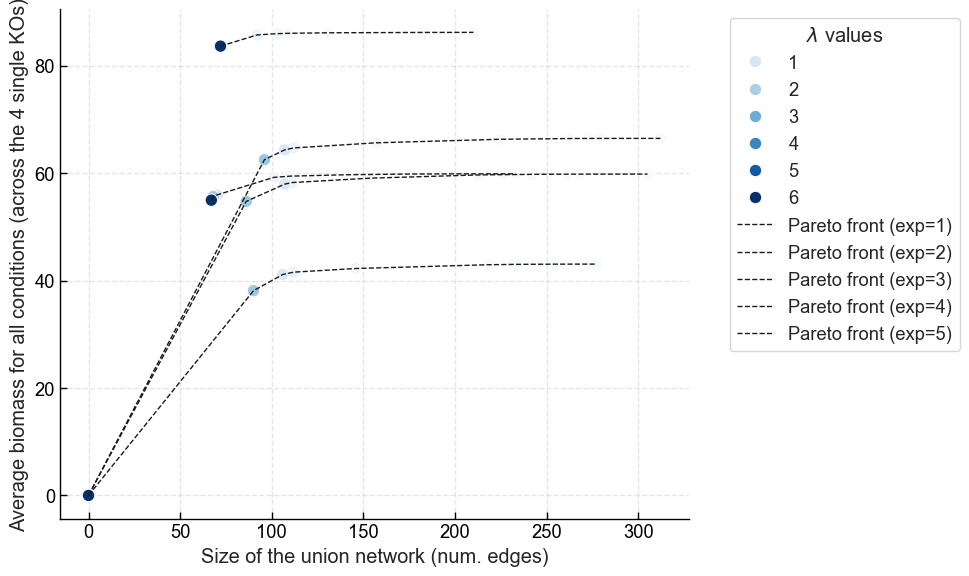

In [9]:
def compute_pareto_front(df):
    points = df[['avg_flux', 'size_union']].values
    n_points = points.shape[0]
    is_pareto = np.ones(n_points, dtype=bool)
    for i in range(n_points):
        for j in range(n_points):
            if i != j:
                # Check if point j dominates point i.
                if ((points[j, 0] <= points[i, 0]) and 
                    (points[j, 1] >= points[i, 1]) and 
                    ((points[j, 0] > points[i, 0]) or (points[j, 1] < points[i, 1]))):
                    is_pareto[i] = False
                    break
    return is_pareto

def plot(df, palette="Blues", ax=None):
    x="size_union"
    y="avg_flux"
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))
    sns.scatterplot(
        data=df,
        y=y,
        x=x,
        hue="lambda",
        s=80,
        palette=sns.color_palette(palette, as_cmap=True),
        #palette=custom_cmap,
        #palette=sns.color_palette("Blues"),
        #palette=sns.color_palette("crest", as_cmap=True),
        ax=ax
    )
    # Compute and plot Pareto fronts for each experiment separately.
    for exp_val, group in df.groupby("exp"):
        mask = compute_pareto_front(group)
        pareto_df = group[mask].sort_values(by="avg_flux")
        # Plot each group's Pareto front.
        sns.lineplot(data=pareto_df, x=x, y=y, 
                     ax=ax, linestyle="--", linewidth=1.0, color='k',
                     label=f"Pareto front (exp={exp_val})")
    

    lambda0_df = df[df["lambda"] == 0]
    sns.scatterplot(data=lambda0_df, x=x, y=y, 
                    ax=ax, marker="x", color="k", s=80, 
                    label="$\\lambda = 0$")
    
    sns.despine()
    plt.legend(title="$\\lambda$ values", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.ylabel("Average biomass for all conditions (across the 4 single KOs)")
    plt.xlabel("Size of the union network (num. edges)")
    plt.tight_layout()  # Adjust the layout to make space for the legend
    return ax

ax = plot(df_rm)

In [ ]:
original_blues = sns.color_palette("Blues", as_cmap=True)
custom_cmap = LinearSegmentedColormap.from_list(
    "custom_blues", original_blues(np.linspace(0.30, 1, 256))
)

# Create the base scatter plot.
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(
    data=df_r,
    x="avg_flux",
    y="size_union",
    hue="lambda",
    s=80,
    #palette=custom_cmap,
    #palette=sns.color_palette("Blues"),
    #palette=sns.color_palette("crest", as_cmap=True),
    ax=ax
)

# Compute and plot Pareto fronts for each experiment separately.
for exp_val, group in df_r.groupby("exp"):
    mask = compute_pareto_front(group)
    pareto_df = group[mask].sort_values(by="avg_flux")
    # Plot each group's Pareto front.
    sns.lineplot(data=pareto_df, x="avg_flux", y="size_union", 
                 ax=ax, linestyle="--", linewidth=1.0, 
                 label=f"Pareto front (exp={exp_val})")

# Optionally, add crosses for lambda == 0.
lambda0_df = df_r[df_r["lambda"] == 0]
sns.scatterplot(data=lambda0_df, x="avg_flux", y="size_union", 
                ax=ax, marker="x", color="k", s=80, 
                label="$\\lambda = 0$")

sns.despine()
plt.legend(title="$\\lambda$ values", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Average biomass for all conditions (across the 4 single KOs)")
plt.ylabel("Size of the union network (num. edges)")
plt.tight_layout()  # Adjust the layout to make space for the legend
#plt.savefig("pareto_sparsefba.pdf", format="pdf")

In [ ]:
def compute_pareto_front(df):
    points = df[['avg_flux', 'size_union']].values
    n_points = points.shape[0]
    is_pareto = np.ones(n_points, dtype=bool)
    for i in range(n_points):
        for j in range(n_points):
            if i != j:
                # Check if point j dominates point i.
                if ((points[j, 0] >= points[i, 0]) and 
                    (points[j, 1] <= points[i, 1]) and 
                    ((points[j, 0] > points[i, 0]) or (points[j, 1] < points[i, 1]))):
                    is_pareto[i] = False
                    break
    return is_pareto


original_blues = sns.color_palette("Blues", as_cmap=True)
custom_cmap = LinearSegmentedColormap.from_list(
    "custom_blues", original_blues(np.linspace(0.30, 1, 256))
)

# Create the base scatter plot.
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(
    data=df_r,
    x="avg_flux",
    y="size_union",
    hue="lambda",
    s=80,
    #palette=custom_cmap,
    #palette=sns.color_palette("Blues"),
    #palette=sns.color_palette("crest", as_cmap=True),
    ax=ax
)

# Compute and plot Pareto fronts for each experiment separately.
for exp_val, group in df_r.groupby("exp"):
    mask = compute_pareto_front(group)
    pareto_df = group[mask].sort_values(by="avg_flux")
    # Plot each group's Pareto front.
    sns.lineplot(data=pareto_df, x="avg_flux", y="size_union", 
                 ax=ax, linestyle="--", linewidth=1.0, 
                 label=f"Pareto front (exp={exp_val})")

# Optionally, add crosses for lambda == 0.
lambda0_df = df_r[df_r["lambda"] == 0]
sns.scatterplot(data=lambda0_df, x="avg_flux", y="size_union", 
                ax=ax, marker="x", color="k", s=80, 
                label="$\\lambda = 0$")

sns.despine()
plt.legend(title="$\\lambda$ values", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Average biomass for all conditions (across the 4 single KOs)")
plt.ylabel("Size of the union network (num. edges)")
plt.tight_layout()  # Adjust the layout to make space for the legend
#plt.savefig("pareto_sparsefba.pdf", format="pdf")